Importamos todas las librerias necesarias en el notebook

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sys
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

Leemos el dataset correspondiente al primer practico.

In [3]:
def CustomParser(data):
    if data is '':
        return []
    import ast
    return ast.literal_eval(data)

dataset = pandas.read_csv('meli_dataset_20190426.csv', converters={'ATTRIBUTES':CustomParser}, nrows=100000)
row0 = dataset.shape[0]
row0

100000

In [4]:
dataset.head()

,ITEM_ID,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,DOMAIN_ID,PRICE,SELLER_ID,STATUS,TITLE
0,M1CQ76ZT5W,NaN,NaN,NaN,NaN,[],H53U1H7Q5G,NaN,NaN,NaN,NaN,404,NaN
1,SN7ISIGQ9J,235.0,25.0,25.0,10.0,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",H53U1H7Q5G,new,MLB-SKIN_CARE_SUPPLIES,68.0,QF4OJMYQ9Q,active,Ácido Hidroquinona 20% 30g + Sabonete Pré Pe...
2,JGEV50GW2U,1757.0,23.0,17.0,16.0,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acess...",YRBDJR6T7Y,new,MLB-NEBULIZERS,145.9,WEE71CZC2Q,active,Inalador E Nebulizador Infantil Nebdog Superfl...
3,JGEV50GW2U,1748.0,23.0,17.0,16.0,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acess...",YRBDJR6T7Y,new,MLB-NEBULIZERS,145.9,WEE71CZC2Q,active,Inalador E Nebulizador Infantil Nebdog Superfl...
4,JGEV50GW2U,NaN,NaN,NaN,NaN,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acess...",YRBDJR6T7Y,new,MLB-NEBULIZERS,145.9,WEE71CZC2Q,active,Inalador E Nebulizador Infantil Nebdog Superfl...


**1 - Eliminar valores cuyo status sea `404` , luego eliminar la columna `status` del dataset ya que solo es útil para limpieza.**

In [5]:
indices = dataset[ dataset['STATUS'] == '404' ].index
dataset.drop(indices , inplace=True)

In [6]:
row1 = dataset.shape[0]
row0-row1

14655

In [7]:
row0/(row0-row1)

6.823609689525759

Vemos que 78361 filas fueron removidas. Esto es un 6 porciento de data set original de casi 500 mil filas.

2 - Eliminar los valores NaN de las columnas con prefijo `SHP_`. Estas son aquellas que representan o peso o dimensiones de un item.

In [8]:
indices = dataset[dataset['SHP_WEIGHT'].isna() | dataset['SHP_LENGTH'].isna() | 
                  dataset['SHP_WIDTH'].isna() | dataset['SHP_HEIGHT'].isna() ].index
dataset.drop(indices , inplace=True)
row2 = dataset.shape[0]

In [9]:
print('Nos quedan ',row2,' filas. Fueron removidas ',row1-row2, '. Esto es un ',row2/(row1-row2),'porciento.')

Nos quedan  59938  filas. Fueron removidas  25407 . Esto es un  2.35911363010194 porciento.


**3-Agrupar por item id y calcular mediana de peso y medidas. De esta forma debería quedar una única fila por cada item_id.**


In [10]:
listColumns = list(dataset.columns)
columns_dic={}
for item in listColumns:
    if item.startswith('SHP_'):
        columns_dic[item] = 'median'
    else:
        columns_dic[item] = 'first'
dataset = dataset.groupby('ITEM_ID').agg(columns_dic)


In [11]:
dataset.describe()

,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,PRICE
count,47794.000000,47794.000000,47794.000000,47794.000000,4.281400e+04
mean,1782.875455,31.275372,20.944846,11.338381,7.760315e+02
std,3074.927432,18.507890,11.007366,8.163078,1.003895e+05
min,1.000000,0.000000,0.000000,0.000000,1.000000e-01
25%,250.000000,20.000000,12.000000,5.000000,4.590000e+01
50%,650.000000,25.000000,20.000000,10.000000,9.900000e+01
75%,1861.750000,36.000000,25.000000,15.000000,1.799000e+02
max,42700.000000,288.200000,105.000000,85.000000,2.000000e+07


**4-Parsear la columna de atributos y extraer a columnas propias aquellos atributos cuyo `id` sea `BRAND` o `MODEL`. Estos atributos representan marca o modelo que el vendedor del item ingresó en la publicación. [Opcional] No es necesario limitarse a estos dos atributos, se puede probar quedarse con los N atributos más frecuentes.**



In [12]:
dataset.head()

,ITEM_ID,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,DOMAIN_ID,PRICE,SELLER_ID,STATUS,TITLE
ITEM_ID,,,,,,,,,,,,,
A002DG7EAZ,A002DG7EAZ,812.0,36.0,32.0,12.0,[],H53U1H7Q5G,NaN,NaN,NaN,U2T0EY02XB,under_review,Apresentador Multimídia Wireless Logitech R400...
A00SG33UIH,A00SG33UIH,2320.0,16.0,11.0,4.0,"[{'id': 'AUTHOR', 'name': 'Autor', 'value_id':...",H53U1H7Q5G,new,MLB-BOOKS,149.99,BCZWFNME44,active,Apostila Trt-sp 2018 - Analista Jud. Área Apo...
A0212UOK33,A0212UOK33,595.0,24.0,11.0,7.0,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",WRIHRTEP3M,new,MLB-PERFUMES,415.49,CT0YFG9NX0,active,Polo Black ( Preto ) 200ml Masculino | Ganhe A...
A021RGAH7U,A021RGAH7U,110.0,17.0,14.0,6.0,[],H53U1H7Q5G,NaN,NaN,NaN,P9VRNLM3AL,under_review,Tela Vidro Samsung Galaxy S3 Mini Gt-i8190 Ori...
A03R64R3R0,A03R64R3R0,860.0,16.0,11.0,4.0,"[{'id': 'ITEM_CONDITION', 'name': 'Condição do...",H53U1H7Q5G,new,MLB-FISHING_LINES,93.90,LRL1YL0D48,active,"Linha Monofilamento Platinumxt C/10 0,70mm/100..."


In [13]:

def parse_attributes(row):
    data_dict = row['ATTRIBUTES']
    #print(data_dict)
    data_df = pandas.DataFrame.from_dict(data_dict)
    if not 'id' in data_df.columns:
        return '',''
    brand_value_name = data_df[data_df['id']=='BRAND']['value_name'].values
    model_value_name = data_df[data_df['id']=='MODEL']['value_name'].values
    if brand_value_name.size == 1:
        brand_value_name = brand_value_name[0]
    else:
        brand_value_name = ''
    if model_value_name.size == 1:
        model_value_name = model_value_name[0]
    else:
        model_value_name = ''
    return brand_value_name, model_value_name

#dataset.sample(50).apply(parse_attributes, axis=1)
dataset['BRAND'], dataset['MODEL'] = zip(*dataset.apply(parse_attributes, axis=1))
#dataset2 = dataset.apply(parse_attributes, axis=1)


In [14]:
dataset.to_pickle('dataset_parsed.pkl')

In [15]:
dataset = pandas.read_pickle('dataset_parsed.pkl') 

In [16]:
dataset.head()

,ITEM_ID,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,DOMAIN_ID,PRICE,SELLER_ID,STATUS,TITLE,BRAND,MODEL
ITEM_ID,,,,,,,,,,,,,,,
A002DG7EAZ,A002DG7EAZ,812.0,36.0,32.0,12.0,[],H53U1H7Q5G,NaN,NaN,NaN,U2T0EY02XB,under_review,Apresentador Multimídia Wireless Logitech R400...,,
A00SG33UIH,A00SG33UIH,2320.0,16.0,11.0,4.0,"[{'id': 'AUTHOR', 'name': 'Autor', 'value_id':...",H53U1H7Q5G,new,MLB-BOOKS,149.99,BCZWFNME44,active,Apostila Trt-sp 2018 - Analista Jud. Área Apo...,,
A0212UOK33,A0212UOK33,595.0,24.0,11.0,7.0,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",WRIHRTEP3M,new,MLB-PERFUMES,415.49,CT0YFG9NX0,active,Polo Black ( Preto ) 200ml Masculino | Ganhe A...,Ralph Lauren,
A021RGAH7U,A021RGAH7U,110.0,17.0,14.0,6.0,[],H53U1H7Q5G,NaN,NaN,NaN,P9VRNLM3AL,under_review,Tela Vidro Samsung Galaxy S3 Mini Gt-i8190 Ori...,,
A03R64R3R0,A03R64R3R0,860.0,16.0,11.0,4.0,"[{'id': 'ITEM_CONDITION', 'name': 'Condição do...",H53U1H7Q5G,new,MLB-FISHING_LINES,93.90,LRL1YL0D48,active,"Linha Monofilamento Platinumxt C/10 0,70mm/100...",,


**5-Transformar variables categóricas en números (Se recomienda OneHotEncoding) para las columnas (Sugerencia: arrancar con un sample de ~10K items)**<br/>
`CATALOG_PRODUCT_ID`<br/>
`CONDITION`<br/>
`DOMAIN_ID`<br/>
`SELLER_ID`<br/>
`BRAND` (extraída en 4)<br/>
`MODEL`(extraída en 4)

In [17]:
dataset_with_dummies = pandas.get_dummies(dataset, columns=['CATALOG_PRODUCT_ID','CONDITION', 'DOMAIN_ID', 'SELLER_ID', 'BRAND', 'MODEL' ])

In [18]:
dataset.to_pickle('dataset_with_dummies.pkl')

In [19]:
dataset_with_dummies = pandas.read_pickle('dataset_with_dummies.pkl') 

**6-En caso de tener alguna variable no medida (en nuestro caso `PRICE`) imputar sus valores utilizando kNN.**

In [20]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt


In [25]:
dataset_knn = dataset_with_dummies[dataset_with_dummies['PRICE'].notna() ][['SHP_WEIGHT','SHP_LENGTH','SHP_WIDTH','SHP_HEIGHT', 'PRICE']]

In [26]:
dataset_knn.head()

,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,PRICE
ITEM_ID,,,,,
A00SG33UIH,2320.0,16.0,11.0,4.0,149.99
A0212UOK33,595.0,24.0,11.0,7.0,415.49
A03R64R3R0,860.0,16.0,11.0,4.0,93.90
A05WUI8CMM,12100.0,40.0,35.0,35.0,399.00
A064RKVECD,3627.0,25.0,25.0,5.0,153.99


In [27]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(dataset_knn, test_size = 0.3)

x_train = train.drop('PRICE', axis=1)
y_train = train['PRICE']

x_test = test.drop('PRICE', axis = 1)
y_test = test['PRICE']

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 176469.89601165996
RMSE value for k=  2 is: 176468.80099898856
RMSE value for k=  3 is: 176468.9115258329
RMSE value for k=  4 is: 176468.74860544683
RMSE value for k=  5 is: 176468.41860472303
RMSE value for k=  6 is: 176467.49993870925
RMSE value for k=  7 is: 176467.65184833613
RMSE value for k=  8 is: 176467.85986700671
RMSE value for k=  9 is: 176467.8815989298
RMSE value for k=  10 is: 176467.78637557427


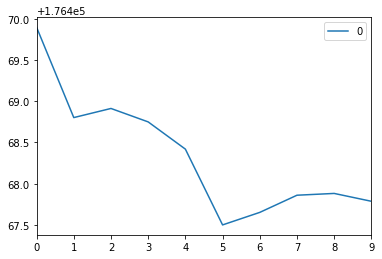

In [29]:
#plotting the rmse values against k values
curve = pandas.DataFrame(rmse_val) #elbow curve 
curve.plot()

Elegimos K=6. Se observa que el error es grande por lo cual KNN sobre las dimensiones y el peso no parece dar buenos resultados.

**7-Medir las distribuciones de las variables como histogramas, realizar normalizaciones e identificar outliers con los métodos vistos en clase. Hacer análisis de estos outliers y considerar si sería correcto o no eliminarlos del dataset. Sugerencia: Identificar outliers de las columnas `SHP_WEIGHT` y `SHP_VOLUME`, donde `SHP_VOLUME` se define como el producto de las dimensiones.**

Graficamos histogramas.

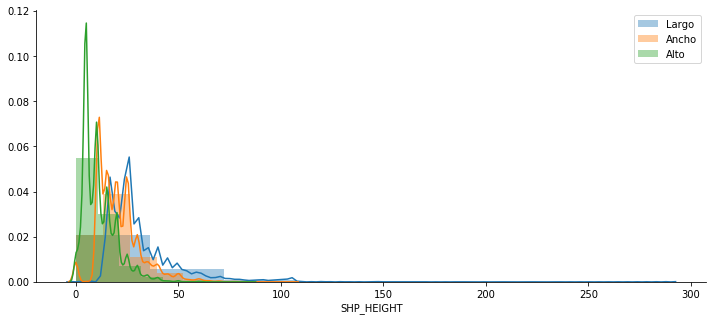

In [30]:
plt.figure(figsize=(12,5))
seaborn.distplot(dataset['SHP_LENGTH'].dropna(), bins=8, label='Largo')
seaborn.distplot(dataset['SHP_WIDTH'].dropna(), bins=8, label='Ancho')
seaborn.distplot(dataset['SHP_HEIGHT'].dropna(), bins=8, label='Alto')
plt.legend()
seaborn.despine()

Identificamos outliers.

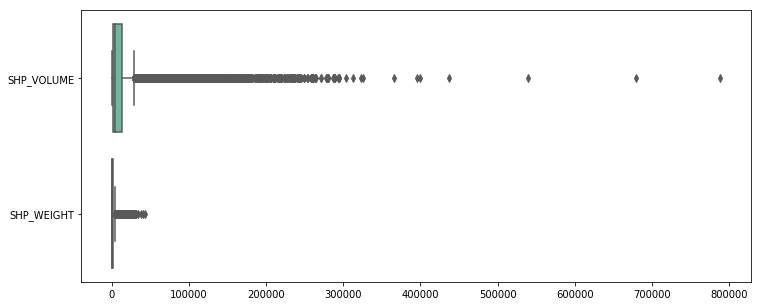

In [31]:
dataset['SHP_VOLUME'] = dataset['SHP_LENGTH'] * dataset['SHP_WIDTH'] * dataset['SHP_HEIGHT']
box = dataset[['SHP_VOLUME','SHP_WEIGHT']]
plt.figure(figsize=(12,5))
seaborn.boxplot(data=box, orient="h", palette="Set2")

**8- (Opcional) Si están interesados en usar texto y técnicas de NLP sobre el título:
Realizar preprocesamiento del texto, se recomienda leer este artículo.
Para convertir el título en vectores se recomienda ver tf-idf. wiki, sklearn.**

**9- (Opcional) Aplicar Mixturas Gaussianas (GMM) para hacer clustering**